# Set up

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-17 09:29:34.632253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Introduction to OpenAi Gymnasium

In [2]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

In [3]:
envs = gym.envs.registry
sorted(envs.keys())

['ALE/Adventure-ram-v5',
 'ALE/Adventure-v5',
 'ALE/AirRaid-ram-v5',
 'ALE/AirRaid-v5',
 'ALE/Alien-ram-v5',
 'ALE/Alien-v5',
 'ALE/Amidar-ram-v5',
 'ALE/Amidar-v5',
 'ALE/Assault-ram-v5',
 'ALE/Assault-v5',
 'ALE/Asterix-ram-v5',
 'ALE/Asterix-v5',
 'ALE/Asteroids-ram-v5',
 'ALE/Asteroids-v5',
 'ALE/Atlantis-ram-v5',
 'ALE/Atlantis-v5',
 'ALE/Atlantis2-ram-v5',
 'ALE/Atlantis2-v5',
 'ALE/Backgammon-ram-v5',
 'ALE/Backgammon-v5',
 'ALE/BankHeist-ram-v5',
 'ALE/BankHeist-v5',
 'ALE/BasicMath-ram-v5',
 'ALE/BasicMath-v5',
 'ALE/BattleZone-ram-v5',
 'ALE/BattleZone-v5',
 'ALE/BeamRider-ram-v5',
 'ALE/BeamRider-v5',
 'ALE/Berzerk-ram-v5',
 'ALE/Berzerk-v5',
 'ALE/Blackjack-ram-v5',
 'ALE/Blackjack-v5',
 'ALE/Bowling-ram-v5',
 'ALE/Bowling-v5',
 'ALE/Boxing-ram-v5',
 'ALE/Boxing-v5',
 'ALE/Breakout-ram-v5',
 'ALE/Breakout-v5',
 'ALE/Carnival-ram-v5',
 'ALE/Carnival-v5',
 'ALE/Casino-ram-v5',
 'ALE/Casino-v5',
 'ALE/Centipede-ram-v5',
 'ALE/Centipede-v5',
 'ALE/ChopperCommand-ram-v5',
 'ALE/

In [4]:
envs["CartPole-v1"]

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

In [5]:
obs, info = env.reset(seed=42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [6]:
obs[np.newaxis]

array([[ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ]],
      dtype=float32)

In [7]:
info

{}

In [8]:
img = env.render()
img.shape

(400, 600, 3)

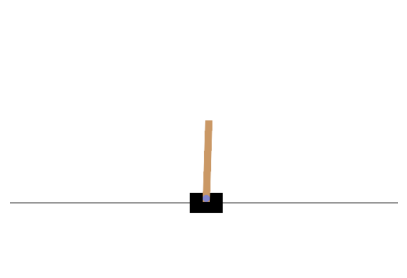

In [9]:
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img


plot_environment(env)
plt.show()

In [10]:
env.action_space

Discrete(2)

In [11]:
action = 1  # accelerate right
obs, reward, done, truncated, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

Notice that the cart is now moving toward the right (`obs[1] > 1`). The pole is still tilted toward the right (`obs[2] > 0`), but its angular velocity is now negative (`obs[3] < 0`), so will be likely to be titled toward the left in the next step.

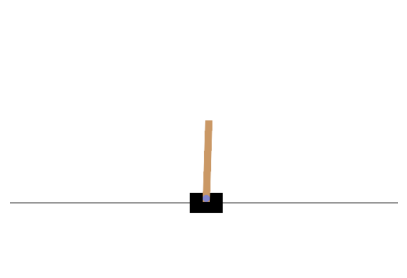

In [12]:
plot_environment(env)
plt.show()

The environment tells the agent how much reward it got during the last step.

In [13]:
reward

1.0

When the game is over, the environment returns `done=True`. In this case, it's not over yet.

In [14]:
done

False

Some environment wrappers may want to interrupt the environment early. Foe example, when a time limit is reached or when an object goes out of bounds. In this case, `truncated` will be set to `True`. In this case, it's not truncated yet. 

In [15]:
truncated

False

Finally, `info` is an environment-specific dictionary that can provides some extra information that you may find useful for debugging or for training. For example, in some games it may indicate hwo many lives the agent has. In our case though, it's empty.

In [16]:
info

{}

The sequences of steps between the moment the environment is reset until it's done or truncated is called an "episode". At the end of the episode (i.e., when `step()` returns `done=True` or `truncated=True`), you should reset the environment before you continue to use it.

In [17]:
if done or truncated:
    obs, info = env.reset()

## A simple hardcoded policy

Let's hardcode a simple policy that accelerate the cart to the left when the pole is tilted to the left and accelerate the cart to the right when the pole is titled ot the right.

In [18]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1


totals = []
for episode in range(500):
    episode_reward = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_reward += reward
        if done or truncated:
            break
    totals.append(episode_reward)

In [19]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.698, 8.389445512070509, 24.0, 63.0)

In [32]:
import matplotlib
import matplotlib.animation

matplotlib.rc("animation", html="jshtml")


def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return (patch,)


def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis("off")
    animation = matplotlib.animation.FuncAnimation(
        fig,
        update_scene,
        fargs=(frames, patch),
        frames=len(frames),
        repeat=repeat,
        interval=interval,
    )
    plt.close()
    return animation


def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1", render_mode="rgb_array")
    np.random.seed(42)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)


show_one_episode(basic_policy)

NameError: name 'basic_policy' is not defined

# Neural Network Policies

In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

2024-04-17 08:58:38.736301: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
def pg_policy(obs):
    left_proba = model.predict(obs[tf.newaxis], verbose=0)
    return int(np.random.rand() > left_proba)


np.random.seed(42)
show_one_episode(pg_policy)

# Policy Gradients

In [23]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = tf.random.uniform([1, 1]) > left_proba
        y_target = tf.constant([[1.0]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))

    gradients = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, truncated, info = env.step(int(action))
    return obs, reward, done, truncated, gradients

In [24]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_gradients = []
    for episode in range(n_episodes):
        current_rewards = []
        current_gradients = []
        obs, info = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, truncated, gradients = play_one_step(
                env, obs, model, loss_fn
            )
            current_rewards.append(reward)
            current_gradients.append(gradients)
            if done or truncated:
                break
        all_rewards.append(current_rewards)
        all_gradients.append(current_gradients)
    return all_rewards, all_gradients

In [25]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted


def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [
        discount_rewards(rewards, discount_factor) for rewards in all_rewards
    ]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [
        (discounted_rewards - reward_mean) / reward_std
        for discounted_rewards in all_discounted_rewards
    ]

In [26]:
discount_rewards([10, 0, -50], discount_factor=0.8)

array([-22, -40, -50])

In [27]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [28]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

In [29]:
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(5, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

obs, info = env.reset(seed=42)

In [30]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

In [31]:
for iteration in range(n_iterations):
    all_rewards, all_gradients = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn
    )

    total_rewards = sum(map(sum, all_rewards))
    print(
        f"\rIteration: {iteration+1}/{n_iterations},",
        f" mean rewards: {total_rewards / n_episodes_per_update:.1f}",
        end="",
    )

    all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor)
    all_mean_gradients = []
    for var_index in range(len(model.trainable_variables)):
        mean_gradients = tf.reduce_mean(
            [
                final_reward * all_gradients[episode_index][step][var_index]
                for episode_index, final_rewards in enumerate(all_final_rewards)
                for step, final_reward in enumerate(final_rewards)
            ],
            axis=0,
        )
        all_mean_gradients.append(mean_gradients)

    optimizer.apply_gradients(zip(all_mean_gradients, model.trainable_variables))

Iteration: 150/150,  mean rewards: 197.4

In [32]:
np.random.seed(42)
show_one_episode(pg_policy)

# Markov Decisions Process

## Markov Chains

The following transition probabilities correspond to the Markov Chain represented in the learning notebook. Let's run this stochastic process for a few times to see what it looks like:

In [33]:
np.random.seed(42)

transition_probabilities = [  # shape=[s, s']
    [0.7, 0.2, 0.0, 0.1],  # from state s0 to state s0, s1, s2, s3
    [0.0, 0.0, 0.9, 0.1],  # from state s1 to state s0, s1, s2, s3
    [0.0, 1.0, 0.0, 0.0],  # from state s2 to state s0, s1, s2, s3
    [0.0, 0.0, 0.0, 1.0],  # from state s3 to state s0, s1, s2, s3
]

n_max_steps = 100  # avoid stuck in an infinite loop
terminal_states = [3]


def run_chain(start_state):
    current_state = start_state
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state in terminal_states:
            break
        current_state = np.random.choice(
            range(len(transition_probabilities)),
            p=transition_probabilities[current_state],
        )
    else:
        print("...", end="")
    print()


for idx in range(10):
    print(f"Run {idx + 1}: ", end="")
    run_chain(0)

Run 1: 0 0 3 
Run 2: 0 1 2 1 2 1 2 1 2 1 3 
Run 3: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
Run 4: 0 3 
Run 5: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
Run 6: 0 1 3 
Run 7: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
Run 8: 0 0 0 1 2 1 2 1 3 
Run 9: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
Run 10: 0 0 0 1 2 1 3 


## Markov Decision Process

We consider the state s0, action a0, then we have 0.7 chance go to s0 with reward +10, 0.3 go to s1 with no reward and 0.0 go to s2. In state s1, we don't have a1, hence the transition probability is `None` and the corresponding reward is a vector full of zeros.

In [34]:
transition_probabilities = [
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
    [None, [0.8, 0.1, 0.1], None],
]

rewards = [
    [[10.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
    [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, -50.0]],
    [[0.0, 0.0, 0.0], [40.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
]

possible_actions = [[0, 1, 2], [0, 2], [1]]

## Q-value Iteration

In [35]:
Q_values = np.full([3, 3], -np.inf)  # -np.inf for impossible actions
for state, action in enumerate(possible_actions):
    Q_values[state][action] = 0.0  # 0 for all possible actions

In [36]:
discount_factor = 0.9

history1 = []  # used for later comparison
for iteration_idx in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s][a] = np.sum(
                [
                    transition_probabilities[s][a][s_prev]
                    * (
                        rewards[s][a][s_prev]
                        + discount_factor * np.max(Q_values[s_prev])
                    )
                    for s_prev in range(3)
                ]
            )
history1 = np.array(history1)

In [37]:
Q_values

array([[18.91891892, 17.02702703, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [38]:
Q_values.argmax(axis=-1)  # optimal action for each state

array([0, 0, 1])

The best action for the state 2 is the action 0: stay still. But with if you increase the discount factor a bit.

In [39]:
Q_values = np.full([3, 3], -np.inf)  # -np.inf for impossible actions
for state, action in enumerate(possible_actions):
    Q_values[state][action] = 0.0  # 0 for all possible actions

discount_factor = 0.95

for iteration_idx in range(50):
    Q_prev = Q_values
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s][a] = np.sum(
                [
                    transition_probabilities[s][a][s_prev]
                    * (
                        rewards[s][a][s_prev]
                        + discount_factor * np.max(Q_values[s_prev])
                    )
                    for s_prev in range(3)
                ]
            )
Q_values.argmax(axis=-1)

array([0, 2, 1])

And now we should walk through the fire! This means sense, since now we favor future rewards more, which means we can accept pain in the moment to gain in the future. 

# Q-learning

In [40]:
def step(state, action):
    proba = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=proba)
    reward = rewards[state][action][next_state]
    return next_state, reward

In [41]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [42]:
# Extra code to initialize the Q-values, like we did earlier
np.random.seed(42)
Q_values = np.full([3, 3], -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0

In [43]:
alpha0 = 0.05  # initial learning rate
decay = 0.005  # learning rate decay
gamma = 0.9  # discount factor
state = 0  # initial state
history2 = []

for iteration in range(10_000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = Q_values[next_state].max()  # greedy policy at the next step
    alpha = alpha0 / (1 + decay * iteration)
    Q_values[state][action] *= 1 - alpha
    Q_values[state][action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2)

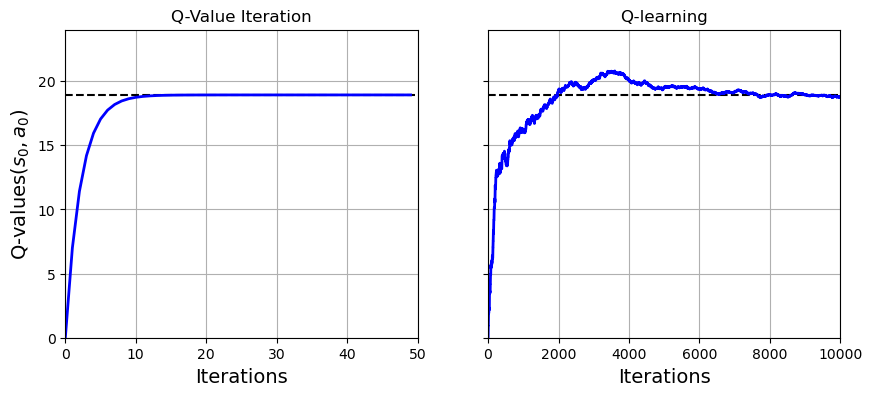

In [44]:
true_Q_value = history1[-1, 0, 0]
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-values($s_0, a_0$)", fontsize=14)
axes[0].set_title("Q-Value Iteration")
axes[1].set_title("Q-learning")
for ax, width, history in zip(axes, (50, 10000), [history1, history2]):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])
    ax.grid()

# Deep Q-network

Here we build the DQN. Given a state, it will estimate, for each action, the sum of expected reward it can expect before playing that action (but before it sees the outcomes).

In [17]:
tf.random.set_seed(42)

input_shape = [4]  # == env.observation_space.shape
n_outputs = 2  # == env.action_space.shape

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
        tf.keras.layers.Dense(32, activation="elu"),
        tf.keras.layers.Dense(n_outputs),
    ]
)

2024-04-17 09:29:52.504928: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


To select an action using this policy, we just pick the action with the highest predicted Q-value. However, to ensure that the agent explores the environment thoroughly, we choose a random action with probability `epsilon`.

In [18]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)  # random action
    else:
        # we need to add one ore dimension to make a batch
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()  # optimal action according to the DQN

We will also need a replay buffer to keep track of recent experiences. It will has the form of `(obs, action , reward, next_obs, done, truncate)`.

In [19]:
from collections import deque

replay_buffer = deque(maxlen=2000)

**Note**: for very large replay buffer, you may want to use a circular buffer instead, as random access time will be O(1) instead of O(N). You can also check out DeepMind's [Reverb library](https://github.com/google-deepmind/reverb).

In [20]:
# extra code - A basic circular buffer implementation


class ReplayBuffer:
    def __init__(self, max_size) -> None:
        self.buffer = np.empty(max_size, dtype=object)
        self.max_size = max_size
        self.size = 0
        self.index = 0

    def append(self, object):
        self.buffer[self.index] = object
        self.size = np.min(self.size + 1, self.max_size)
        self.index = (self.index + 1) / self.max_size

    def sample(self, batch_size):
        indices = np.random.randint(self.size, size=batch_size)
        return self.buffer[indices]

We also need a function to sample experiences from the replay buffer. It will return 6 NumPy arrays: `[obs, actions , rewards, next_obs, dones, truncates]`.

In [21]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)
    ]  # [states, actions, rewards, next_states, dones, truncateds]

Now we can create a function to use the DQN to play one step, and record its experience in the replay buffer.

In [22]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, truncated, info = env.step(action)
    replay_buffer.append([state, action, reward, next_state, done, truncated])
    return next_state, reward, done, truncated, info

Lastly, let's create a function that will sample some experience from the replay buffer and perform a training step.

In [23]:
# extra code - for reproducibility, and to generate the next figure
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

In [24]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)  # episode is not done or truncated
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

And now, let's train the model!

In [25]:
for episode in range(600):
    obs, info = env.reset()
    for step in range(200):
        epsilon = np.max([1 - episode / 500, 0.01])
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        if done or truncated:
            break
    # Extra code to display debug info, stores data for the next figure, and keeps track of the bets model weights so far
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)  # extra code - to restore the best model weights

Episode: 85, Steps: 22, eps: 0.832

KeyboardInterrupt: 

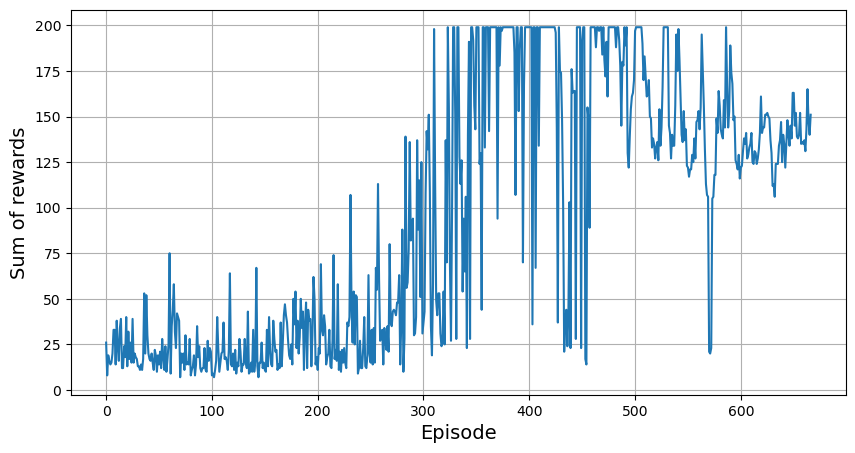

In [55]:
# Extra code to generate the figure in the book
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.grid()
plt.show()

In [56]:
show_one_episode(epsilon_greedy_policy)

# Deep Q-learning Variants

## Fixed Q-value Targets

Let's create the online DQN.

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
        tf.keras.layers.Dense(32, activation="elu"),
        tf.keras.layers.Dense(n_outputs),
    ]
)

Now we create the target DQN, which is just a clone of the online DQN.

In [27]:
target = tf.keras.models.clone_model(model)
target.set_weights(model.get_weights())

Next, we use the same code as above expect for the line marked with  `# <= CHANGED`.

In [34]:
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)
rewards = []
best_score = 0

batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error

replay_buffer = deque(maxlen=2000)


def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = target.predict(next_states, verbose=0)  # <= CHANGED
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)
    target_Q_values = rewards + discount_factor * runs * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Again, this is the same code as earlier, excepted the line marked with `# <= CHANGED`.

In [35]:
for episode in range(600):
    obs, info = env.reset()
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info, truncated = play_one_step(env, obs, epsilon)
        if done or truncated:
            break
    # Extra code to display debug info, stores data for the next figure, and keeps track of the bets model weights so far
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}", end="")
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)
        if episode % 50 == 0:  # <= CHANGED
            target.set_weights(model.get_weights())  # <= CHANGED

    # # Alternatively, you can do soft updates at each step
    # if episode > 50:
    #     training_step(batch_size)
    #     target_weights = target.get_weights()
    #     online_weights = model.get_weights()
    #     for index, online_weight in enumerate(online_weights):
    #         target_weights[index] = target_weights[index] * 0.99 + online_weight * 0.01
    #     target.set_weights(target_weights)
model.set_weights(best_weights)

Episode: 600, Steps: 200, eps: 0.010

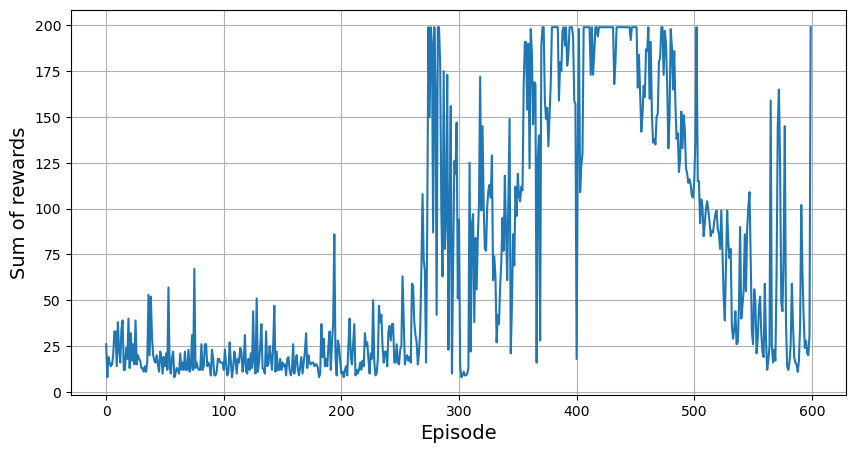

In [36]:
# extra code- display the reward
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.grid()
plt.show()

In [37]:
# extra code - shows an animation of the trained DQN playing one episode
show_one_episode(epsilon_greedy_policy)